### 07-3 산경망 모델 훈련
#### 핵심키워드: 드롭아웃, 콜백, 조기 종료

#### 손실곡선

In [8]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import tensorflow as tf

print("Keras:", keras.__version__)
print("TensorFlow:", tf.__version__)
print("Backend:", keras.config.backend())
	


Keras: 3.8.0
TensorFlow: 2.18.0
Backend: tensorflow


In [9]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [10]:
def model_fn(a_layer=None): 
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer: 
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [11]:
model = model_fn()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [13]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


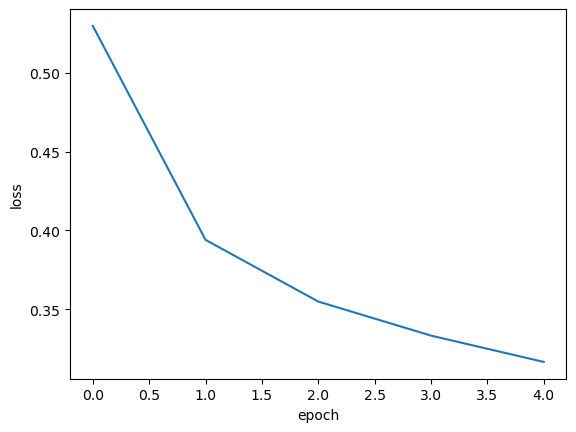

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch') 
plt.ylabel('loss')
plt.show()

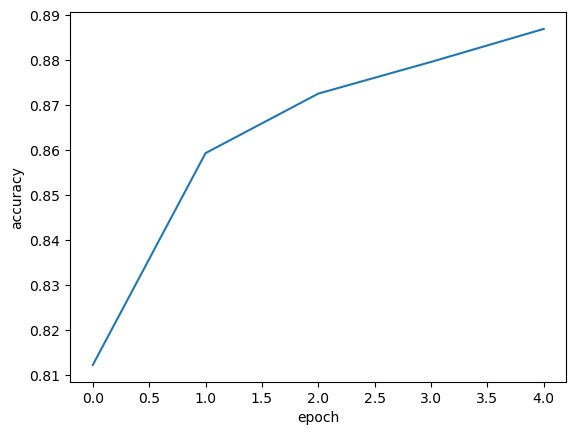

In [15]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

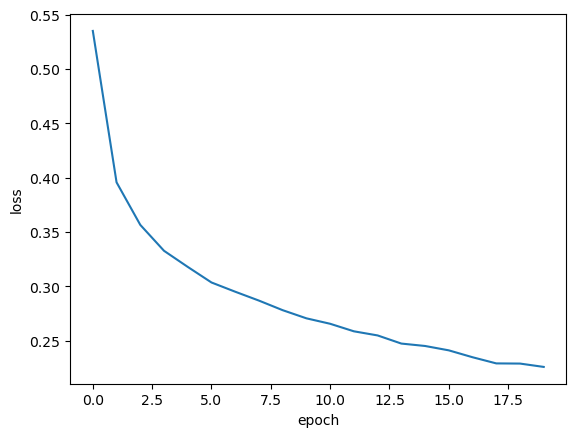

In [16]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 검증손실

In [17]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [18]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


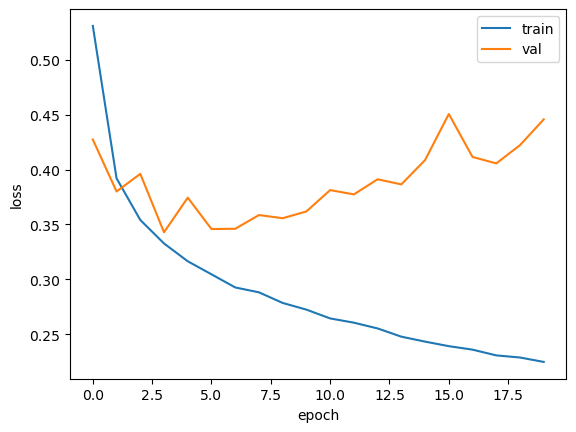

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

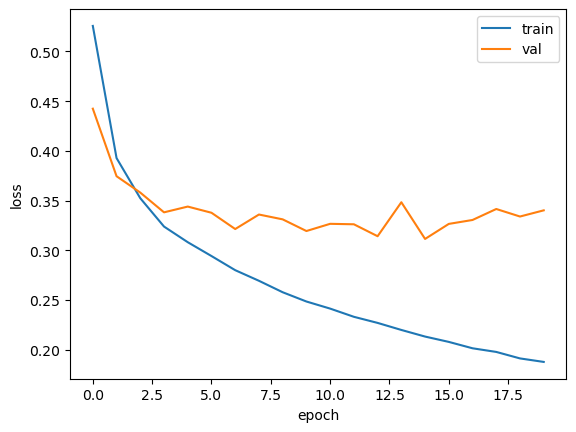

In [20]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### 드롭아웃

In [21]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

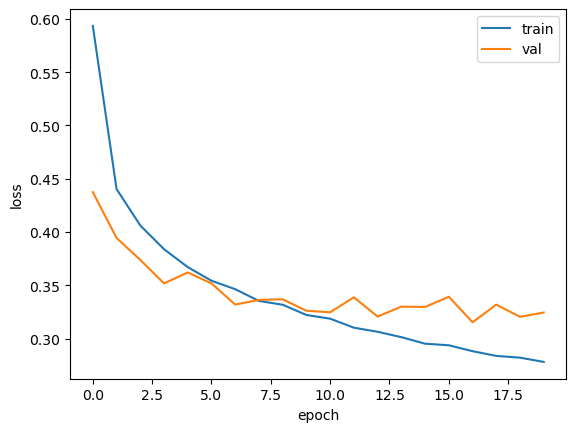

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### 모델 저장과 복원

In [23]:
model = model_fn(keras.layers.Dropout (0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=11, verbose=0,
                    validation_data=(val_scaled, val_target))

In [24]:
model.save('model-whole.keras')

In [25]:
model.save_weights('model.weights.h5')

In [26]:
!ls -al model*

-rw-r--r-- 1 user user 979391 Nov 17 17:40 model-whole.keras
-rw-r--r-- 1 user user 976600 Nov 17 17:40 model.weights.h5


In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [28]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
0.8815


In [29]:
model = keras.models.load_model('model-whole.keras') 
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8828 - loss: 0.3175


[0.3196251690387726, 0.8815000057220459]

#### 콜백

In [31]:
model = model_fn (keras. layers. Dropout (0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', 
                                                save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, 
            validation_data=(val_scaled, val_target), 
            callbacks=[checkpoint_cb])

In [32]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8873 - loss: 0.3167


[0.3184122145175934, 0.8859166502952576]

In [34]:
moodel = model_fn(keras. layers. Dropout (0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [35]:
print(early_stopping_cb.stopped_epoch)

4


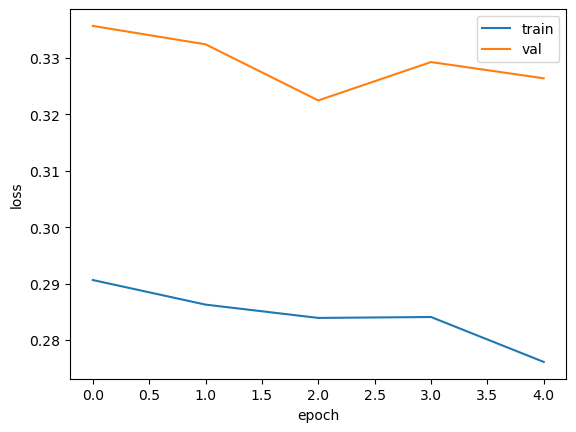

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8870 - loss: 0.3224


[0.3224765956401825, 0.8850833177566528]